# **Covid-19 Data Exploration using python - 1**

## **This file is dedidcated for data exloration of overall cases, deaths, icu admissions, and hospitalizations.**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects/Sample Projects

/content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects/Sample Projects


In [ ]:
import pandas as pd

#import the csv while parsing the dates (if the data type of date is not in datetime, this will change it to that)
df = pd.read_csv('owid-covid-data.csv', parse_dates=True)

#then we will see what are the issues to be resolved carefully

In [ ]:
#Let's try to get an overall understanding of the dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365398 entries, 0 to 365397
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    365398 non-null  object 
 1   continent                                   348008 non-null  object 
 2   location                                    365398 non-null  object 
 3   date                                        365398 non-null  object 
 4   total_cases                                 327216 non-null  float64
 5   new_cases                                   355673 non-null  float64
 6   new_cases_smoothed                          354414 non-null  float64
 7   total_deaths                                305512 non-null  float64
 8   new_deaths                                  355720 non-null  float64
 9   new_deaths_smoothed                         354490 non-null  float64
 

In [ ]:
#Checking whether there are any duplicated values
df.duplicated().any()

False

## **It seems, the data type of 'date' column hasn't changed. So we will have to do it manually again.**

## **No duplicated values in the dataset**

## **Also it appears that the 'continent' feature has some null values. We will have to check those & take a decision on them.**

## **Cases, deaths, tests, vaccination data can include null values. So, that's not a concern.**

## **For further analysis, it's better if we add year & month column additionally to this dataset. so we can do better analysis.**

In [ ]:
#Converting object type into datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].info()

#add year & month columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 365398 entries, 0 to 365397
Series name: date
Non-Null Count   Dtype         
--------------   -----         
365398 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1


In [ ]:
#let's explore the null values of the 'continent' field
df_new = df.loc[df['continent'].isnull()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17390 entries, 1447 to 361056
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    17390 non-null  object        
 1   continent                                   0 non-null      object        
 2   location                                    17390 non-null  object        
 3   date                                        17390 non-null  datetime64[ns]
 4   total_cases                                 17146 non-null  float64       
 5   new_cases                                   17364 non-null  float64       
 6   new_cases_smoothed                          17304 non-null  float64       
 7   total_deaths                                16996 non-null  float64       
 8   new_deaths                                  17364 non-null  float64       
 9   ne

In [ ]:
#17390 entries out of 365000 entries is a small portion. SO let's get rid of it.
df.dropna(subset='continent', inplace=True) #removing all the records were null values exist in 'continent' field
df['continent'].isnull().sum() #checing whether there are any null values left in continent field

0

## **To make things easy let's devide this into 2 datframes,covid deaths and vaccinations.**

In [ ]:
df_deaths = df.iloc[:,:25]
df_vaccinations = df.iloc[:, 25:]

df_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vaccinations.head()

,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1


## **Well, I need the population, year, month columns inside df_deaths for further data exploration. So lets add those columns.**



In [ ]:
df_deaths['population'] = df['population']
df_deaths['year'] = df['year']
df_deaths['month'] = df['month']

df_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,population,year,month
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,1
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,1
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,1
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,1
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,1


## **There are so many columns, so let's get few columns & try to get a decent understanding about countries, number of cases, number of deaths, ICU admisions, hopitalizations. I think adding year & month would make things better for future data exploration & visualization**

In [ ]:
df_deaths[['continent','location', 'year', 'month','population', 'total_cases', 'total_deaths', 'icu_patients', 'hosp_patients']].sort_values(by=['continent', 'location'], ascending=[True, True])

,continent,location,year,month,population,total_cases,total_deaths,icu_patients,hosp_patients
4341,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN
4342,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN
4343,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN
4344,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN
4345,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
355508,South America,Venezuela,2023,12,28301700.0,552695.0,5856.0,NaN,NaN
355509,South America,Venezuela,2023,12,28301700.0,552695.0,5856.0,NaN,NaN
355510,South America,Venezuela,2023,12,28301700.0,552695.0,5856.0,NaN,NaN
355511,South America,Venezuela,2023,12,28301700.0,552695.0,5856.0,NaN,NaN


## **It's wierd that there are some cases, & deaths reported, but no hopitalizations or ICU admissions. But it make some sense because at the very begining of the pandemic people died without even realizing they had been infected by covid.**

## **Let's try to get a better understanding about the countries that have been impacted the most by COVID-19. To do this we can rank these countries based on the number of cases, deaths, ICU admissions, and hospitalizations. Best way to do this is to get them as a percentage of the popultions of the respective country because it's abvious that the countries with high population will end up having the highest number of cases, deaths etc.**


In [ ]:
df_deaths['total_cases_percentage'] = (df_deaths['total_cases']/df_deaths['population'])*100
df_deaths['total_deaths_percentage'] = (df_deaths['total_deaths']/df_deaths['population'])*100
df_deaths['icu_patients_percentage'] = (df_deaths['icu_patients']/df_deaths['population'])*100
df_deaths['hosp_patients_percentage'] = (df_deaths['hosp_patients']/df_deaths['population'])*100

#lets take this dataframe into a csv, so that we can use it in power BI or Tableau for visualisations.
df_deaths[['continent', 'location', 'year', 'month', 'population', 'total_cases', 'total_cases_percentage', 'hosp_patients', 'hosp_patients_percentage', 'icu_patients', 'icu_patients_percentage', 'total_deaths', 'total_deaths_percentage']].sort_values(by=['continent', 'location', 'year', 'month'], ascending=[True, True, True, True]).reset_index().to_csv('Covid_impact_on_countries')

In [ ]:
df_deaths[['continent', 'location', 'year', 'month', 'population', 'total_cases', 'total_cases_percentage', 'hosp_patients', 'hosp_patients_percentage', 'icu_patients', 'icu_patients_percentage', 'total_deaths', 'total_deaths_percentage']].sort_values(by=['continent', 'location', 'year', 'month'], ascending=[True, True, True, True]).reset_index()

,index,continent,location,year,month,population,total_cases,total_cases_percentage,hosp_patients,hosp_patients_percentage,icu_patients,icu_patients_percentage,total_deaths,total_deaths_percentage
0,4341,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4342,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4343,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4344,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4345,Africa,Algeria,2020,1,44903228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348003,355508,South America,Venezuela,2023,12,28301700.0,552695.0,1.952869,NaN,NaN,NaN,NaN,5856.0,0.020691
348004,355509,South America,Venezuela,2023,12,28301700.0,552695.0,1.952869,NaN,NaN,NaN,NaN,5856.0,0.020691
348005,355510,South America,Venezuela,2023,12,28301700.0,552695.0,1.952869,NaN,NaN,NaN,NaN,5856.0,0.020691
348006,355511,South America,Venezuela,2023,12,28301700.0,552695.0,1.952869,NaN,NaN,NaN,NaN,5856.0,0.020691


## **We can group it by location & check which countries have the highest number of deaths & cases.**

In [ ]:
df_deaths[['location', 'total_cases', 'total_deaths']].groupby(['location']).aggregate({'total_cases':'max', 'total_deaths':'max'}).sort_values(by=['total_cases'], ascending=[False]).reset_index()

,location,total_cases,total_deaths
0,United States,103436829.0,1144877.0
1,China,99321637.0,121880.0
2,India,45004816.0,533316.0
3,France,38997490.0,167985.0
4,Germany,38437756.0,174979.0
...,...,...,...
238,Scotland,NaN,NaN
239,Taiwan,NaN,NaN
240,Turkmenistan,NaN,NaN
241,Wales,NaN,NaN


## **Countries with high population like USA,Brazil, China,India are on top of the list which is obvious. It would be better if we check the deaths, cases percentage to find the countries that have heavily impacted by covid.**

In [ ]:
df_deaths[['location', 'total_cases_percentage', 'total_deaths_percentage']].groupby('location').aggregate({'total_cases_percentage':'max', 'total_deaths_percentage':'max'}).sort_values(by=['total_cases_percentage'], ascending=False)

,total_cases_percentage,total_deaths_percentage
location,,
San Marino,75.072722,0.373998
Cyprus,73.755451,0.152231
Brunei,71.544225,0.037416
Austria,68.026259,0.252069
South Korea,66.720706,0.069349
...,...,...
Scotland,NaN,NaN
Taiwan,NaN,NaN
Turkmenistan,NaN,NaN


## **As expected, the list is entirely different when checked the total cases, deaths as a percentage of the population of the respective country. By the way, it's suprising that USA is not appearing in the top 25 countries. When I looked at this data back in 2021, it was at the top of the list as far as I can remember. Lets try to filter this dataset by year & check how these ranks have changed over the years.**

In [ ]:
df_deaths[['year','location', 'total_cases_percentage', 'total_deaths_percentage']].groupby(['year','location']).aggregate({'total_cases_percentage':'max', 'total_deaths_percentage':'max'}).sort_values(by=['year','total_deaths_percentage'], ascending=False)

total_cases_percentage  total_deaths_percentage
year location                                                               
2023 Peru                                 13.275056                 0.650710
     Bulgaria                             19.395897                 0.568258
     Bosnia and Herzegovina               12.476860                 0.506382
     Hungary                              22.274509                 0.490343
     North Macedonia                      16.713890                 0.475734
...                                             ...                      ...
2020 Uzbekistan                            0.000026                      NaN
     Vanuatu                               0.000306                      NaN
     Vatican                               3.217822                      NaN
     Wales                                      NaN                      NaN
     Wallis and Futuna                     0.034495                      NaN

[966 rows x 2 columns]

## **As expected the list is entirely different. San Marino, Cyprus have the highest percentage of cases in year 2023, 2022 respectively and Andorra in both 2021 & 2020.**

## **Peru has recorded the highest death percentage among countries in all 4 years.**

## **A plot would display this nicely. Let's try a categorical scatter plot for this.**

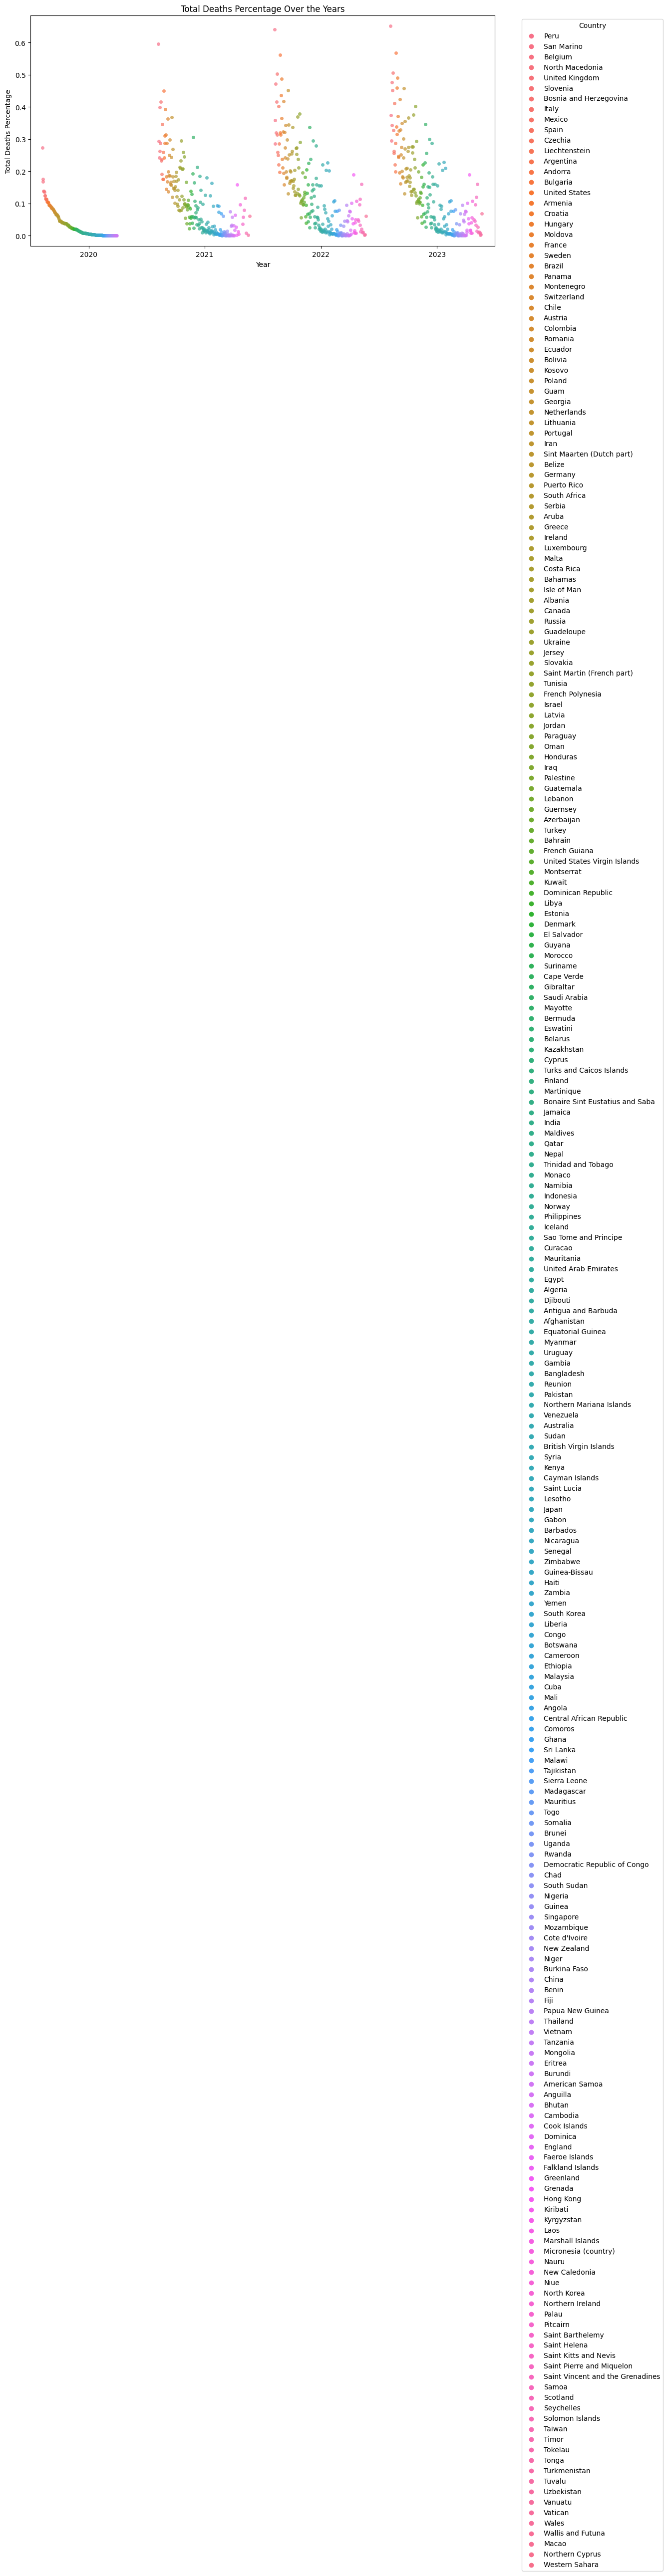

In [ ]:
#import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#get the data into a dataframe
percentage_data = df_deaths[['year','location', 'total_cases_percentage', 'total_deaths_percentage']].groupby(['year','location']).aggregate({'total_cases_percentage':'max', 'total_deaths_percentage':'max'}).sort_values(by=['year','total_deaths_percentage'], ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.stripplot(data=percentage_data, x='year', y='total_deaths_percentage', hue='location', jitter=True, dodge=True, marker='o', alpha=0.7)
plt.title('Total Deaths Percentages of Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Death Percentage')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interesting to see the correlation between the number of hospitalizations and deaths.